In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Wave Height Prediction - Exploratory Analysis

## Overview
This notebook documents the R&D process before productionisation.

**Note:** Exploratory work was refactored into production scripts in `src/` for reproducibility and deployment. View the called functions in `src/` for details. 

# Simple Model with MLflow and Optuna

Simple model to predict significant wave height of one buoy based on another buoy's data.

- `optuna` was used to optimise hyperparameters.
- `mlflow` was used to document model optimisation details.

In [2]:
import logging
import pickle
import warnings

import numpy as np

from marine_ml.constants import MODEL_DIR
from marine_ml.data_loading import get_marine_data
from marine_ml.plots import plot_sig_wave_height, plot_wave_direction_roses
from marine_ml.train import get_preprocessed_data, split_data

warnings.filterwarnings("ignore")

logging.basicConfig(level=logging.INFO)

logger = logging.getLogger("exploration")

/Users/s-northover-naylor/GitHub/marine-ml-pipeline/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Exploration

Load the raw data. Porthleven buoy ID is `107` and Penzance `75`. 

In [3]:
data = get_marine_data()
data.head(3)

,wave_height_significant_m;75,wave_height_max_m;75,sea_surface_temperature_degc;75,wave_period_peak_s;75,wave_period_mean_s;75,wave_direction_deg;75,directional_wave_spread_deg;75,wave_height_significant_m;107,wave_height_max_m;107,sea_surface_temperature_degc;107,wave_period_peak_s;107,wave_period_mean_s;107,wave_direction_deg;107,directional_wave_spread_deg;107
2025-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.73,5.34,11.55,11.11,7.018,216.6,19.1
2025-01-06 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,4.11,11.55,11.76,7.018,219.4,15.6
2025-01-06 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.35,4.66,11.55,10.53,6.780,222.2,20.5


As expected, Porthleven (`107`) measures greater significant wave height compared to Penzance (`75`); Penzance is sheltered from swell by Lands End Penninsula.

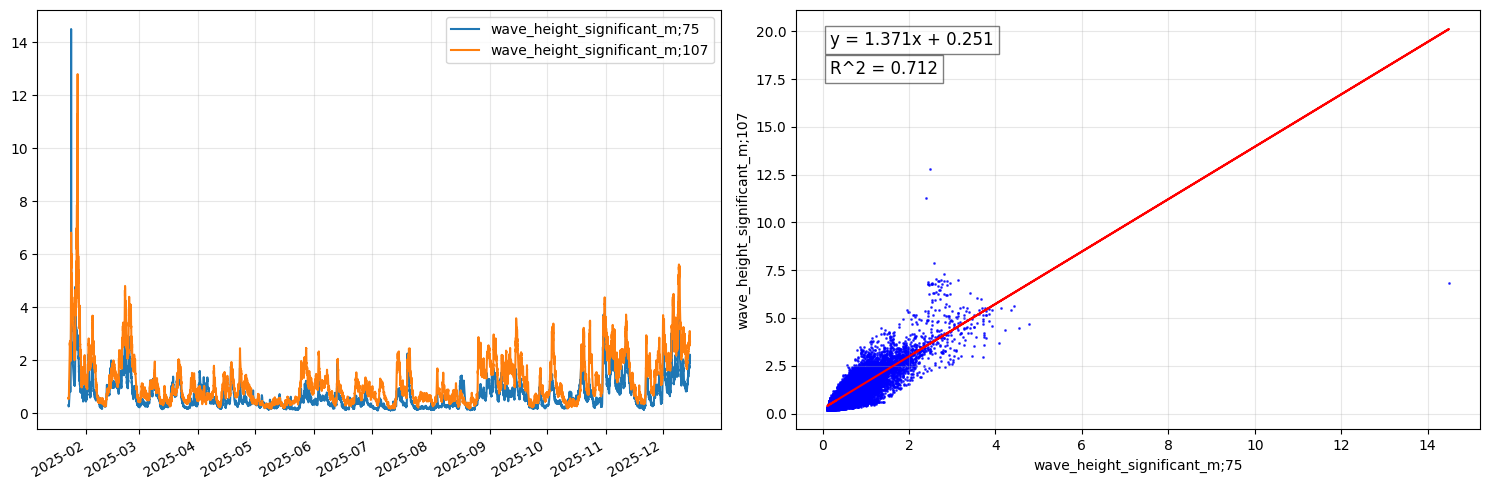

In [4]:
plot_sig_wave_height(data)

As expected, Penzance (75) has a more southerly wave direction as the waves refract around Lands End Penninsula, while Porthleven (107) contains a more westerly component.

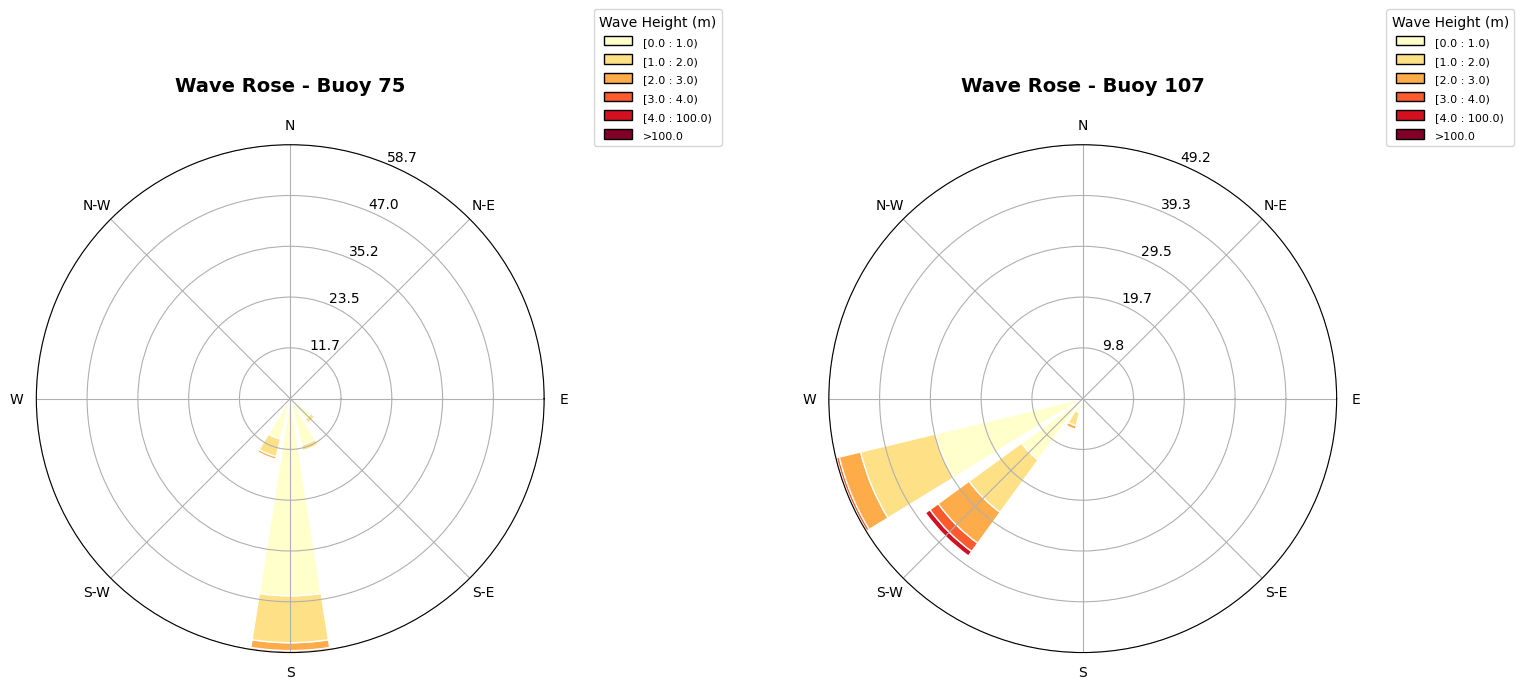

In [5]:
plot_wave_direction_roses(data)

## Load & Preprocess Data

- load the raw data
- perform some basic feature engineering
- split data for train/test

In [6]:
X, y = get_preprocessed_data()
X_train, X_test, y_train, y_test = split_data(X, y)

INFO:marine_ml.prepare_data:Loading preprocessed from cache.


## Train

- train model
- optimise hyperparameters

The model with optimised hyperparameters is saved as the main model in the MLflow UI. The models trialled during the hyperparameter tuning are visible as child runs in the MLflow UI.

In [7]:
%%bash
# Start MLflow UI
poe mlflow-start

Poe => nohup uv run mlflow ui > mlflow.log 2>&1 &


INFO:marine_ml.helpers.optuna_helper:Hyperparameter optimsation with Optuna


🏃 View run pz_predict_lev_run_random_forest at: http://localhost:5000/#/experiments/1/runs/13bf90cfc23449b89da0705b836ee33b
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 0. Best value: 0.143661:   5%|▎      | 1/20 [00:00<00:17,  1.08it/s]

🏃 View run trial_0 at: http://localhost:5000/#/experiments/1/runs/f40102ca47864db6869ad236475ddf28
🧪 View experiment at: http://localhost:5000/#/experiments/1


INFO:marine_ml.helpers.optuna_helper:Trial 1 achieved value: 0.13854027667505892 with  3.6961% improvement
Best trial: 1. Best value: 0.13854:  10%|▊       | 2/20 [00:02<00:26,  1.46s/it]

🏃 View run trial_1 at: http://localhost:5000/#/experiments/1/runs/4c58cbeea9fc47d9a9586c916a1b960e
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 1. Best value: 0.13854:  15%|█▏      | 3/20 [00:05<00:38,  2.24s/it]

🏃 View run trial_2 at: http://localhost:5000/#/experiments/1/runs/b29df95d129c4425ad2768204840fb7d
🧪 View experiment at: http://localhost:5000/#/experiments/1


INFO:marine_ml.helpers.optuna_helper:Trial 3 achieved value: 0.13069581133791833 with  6.0021% improvement
Best trial: 3. Best value: 0.130696:  20%|█▍     | 4/20 [00:07<00:33,  2.09s/it]

🏃 View run trial_3 at: http://localhost:5000/#/experiments/1/runs/f3328f8d18974097b4fd5d86af7c54b8
🧪 View experiment at: http://localhost:5000/#/experiments/1


INFO:marine_ml.helpers.optuna_helper:Trial 4 achieved value: 0.11567658169684554 with  12.9838% improvement
Best trial: 4. Best value: 0.115677:  25%|█▊     | 5/20 [00:10<00:33,  2.20s/it]

🏃 View run trial_4 at: http://localhost:5000/#/experiments/1/runs/85dd65fba4844a1e8632983fe8ac365e
🧪 View experiment at: http://localhost:5000/#/experiments/1


INFO:marine_ml.helpers.optuna_helper:Trial 5 achieved value: 0.11373597365323797 with  1.7062% improvement
Best trial: 5. Best value: 0.113736:  30%|██     | 6/20 [00:14<00:41,  2.94s/it]

🏃 View run trial_5 at: http://localhost:5000/#/experiments/1/runs/cb0f3d3ceec14413bc61ce8ae5fd44dd
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 5. Best value: 0.113736:  35%|██▍    | 7/20 [00:19<00:44,  3.44s/it]

🏃 View run trial_6 at: http://localhost:5000/#/experiments/1/runs/ce01175a336a4e7aae2da7e8236960d1
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 5. Best value: 0.113736:  40%|██▊    | 8/20 [00:21<00:36,  3.05s/it]

🏃 View run trial_7 at: http://localhost:5000/#/experiments/1/runs/44550a3ba39f47f098a2587d22914e70
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 5. Best value: 0.113736:  45%|███▏   | 9/20 [00:23<00:32,  2.93s/it]

🏃 View run trial_8 at: http://localhost:5000/#/experiments/1/runs/69bf9d8a07ce440d9ecd2222392780ed
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 5. Best value: 0.113736:  50%|███   | 10/20 [00:25<00:23,  2.39s/it]

🏃 View run trial_9 at: http://localhost:5000/#/experiments/1/runs/6e01c468a44e48ff9a42fed9658b5152
🧪 View experiment at: http://localhost:5000/#/experiments/1


INFO:marine_ml.helpers.optuna_helper:Trial 10 achieved value: 0.11143719986054942 with  2.0628% improvement
Best trial: 10. Best value: 0.111437:  55%|██▊  | 11/20 [00:29<00:28,  3.12s/it]

🏃 View run trial_10 at: http://localhost:5000/#/experiments/1/runs/2d4ed7e1570845269e46a2b7830360ea
🧪 View experiment at: http://localhost:5000/#/experiments/1


INFO:marine_ml.helpers.optuna_helper:Trial 11 achieved value: 0.11132574600028308 with  0.1001% improvement
Best trial: 11. Best value: 0.111326:  60%|███  | 12/20 [00:34<00:28,  3.59s/it]

🏃 View run trial_11 at: http://localhost:5000/#/experiments/1/runs/e8116e9eb78a4bd5a0fc350ee33c9c00
🧪 View experiment at: http://localhost:5000/#/experiments/1


INFO:marine_ml.helpers.optuna_helper:Trial 12 achieved value: 0.11028628650922465 with  0.9425% improvement
Best trial: 12. Best value: 0.110286:  65%|███▎ | 13/20 [00:40<00:29,  4.17s/it]

🏃 View run trial_12 at: http://localhost:5000/#/experiments/1/runs/c9b0be76aca04f418440201b743dd745
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 12. Best value: 0.110286:  70%|███▌ | 14/20 [00:43<00:24,  4.02s/it]

🏃 View run trial_13 at: http://localhost:5000/#/experiments/1/runs/065e0600d729471fba758e1dd3e4c50e
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 12. Best value: 0.110286:  75%|███▊ | 15/20 [00:46<00:18,  3.74s/it]

🏃 View run trial_14 at: http://localhost:5000/#/experiments/1/runs/aa158ec6de8a4b9cbcd4ea0ce0dda381
🧪 View experiment at: http://localhost:5000/#/experiments/1


INFO:marine_ml.helpers.optuna_helper:Trial 15 achieved value: 0.1079317123913948 with  2.1815% improvement
Best trial: 15. Best value: 0.107932:  80%|████ | 16/20 [00:50<00:15,  3.77s/it]

🏃 View run trial_15 at: http://localhost:5000/#/experiments/1/runs/616d89269a094bd9a72191be7489d9ab
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 15. Best value: 0.107932:  85%|████▎| 17/20 [00:56<00:13,  4.47s/it]

🏃 View run trial_16 at: http://localhost:5000/#/experiments/1/runs/cdfaf8b0f8d14e49b5f31cab8472bf48
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 15. Best value: 0.107932:  90%|████▌| 18/20 [01:00<00:08,  4.15s/it]

🏃 View run trial_17 at: http://localhost:5000/#/experiments/1/runs/af2f6b958fca41bcacabd24c9cab88a1
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 15. Best value: 0.107932:  95%|████▊| 19/20 [01:01<00:03,  3.30s/it]

🏃 View run trial_18 at: http://localhost:5000/#/experiments/1/runs/28e44a71f9d74af29616b942548b8a1d
🧪 View experiment at: http://localhost:5000/#/experiments/1


Best trial: 15. Best value: 0.107932: 100%|█████| 20/20 [01:03<00:00,  3.16s/it]

🏃 View run trial_19 at: http://localhost:5000/#/experiments/1/runs/abec508899084a1c96c5763565f1da2e
🧪 View experiment at: http://localhost:5000/#/experiments/1



INFO:marine_ml.helpers.optuna_helper:Evaluating model
2025/12/30 22:54:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'model-pz-to-lev-random_forest' already exists. Creating a new version of this model...
2025/12/30 22:54:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model-pz-to-lev-random_forest, version 3
Created version '3' of model 'model-pz-to-lev-random_forest'.
INFO:marine_ml.helpers.optuna_helper:Model registered as 'model-pz-to-lev-random_forest' version 3
INFO:marine_ml.helpers.optuna_helper:Promoted to 'Production' stage.


🏃 View run pz_predict_lev_run_random_forest at: http://localhost:5000/#/experiments/1/runs/13bf90cfc23449b89da0705b836ee33b
🧪 View experiment at: http://localhost:5000/#/experiments/1


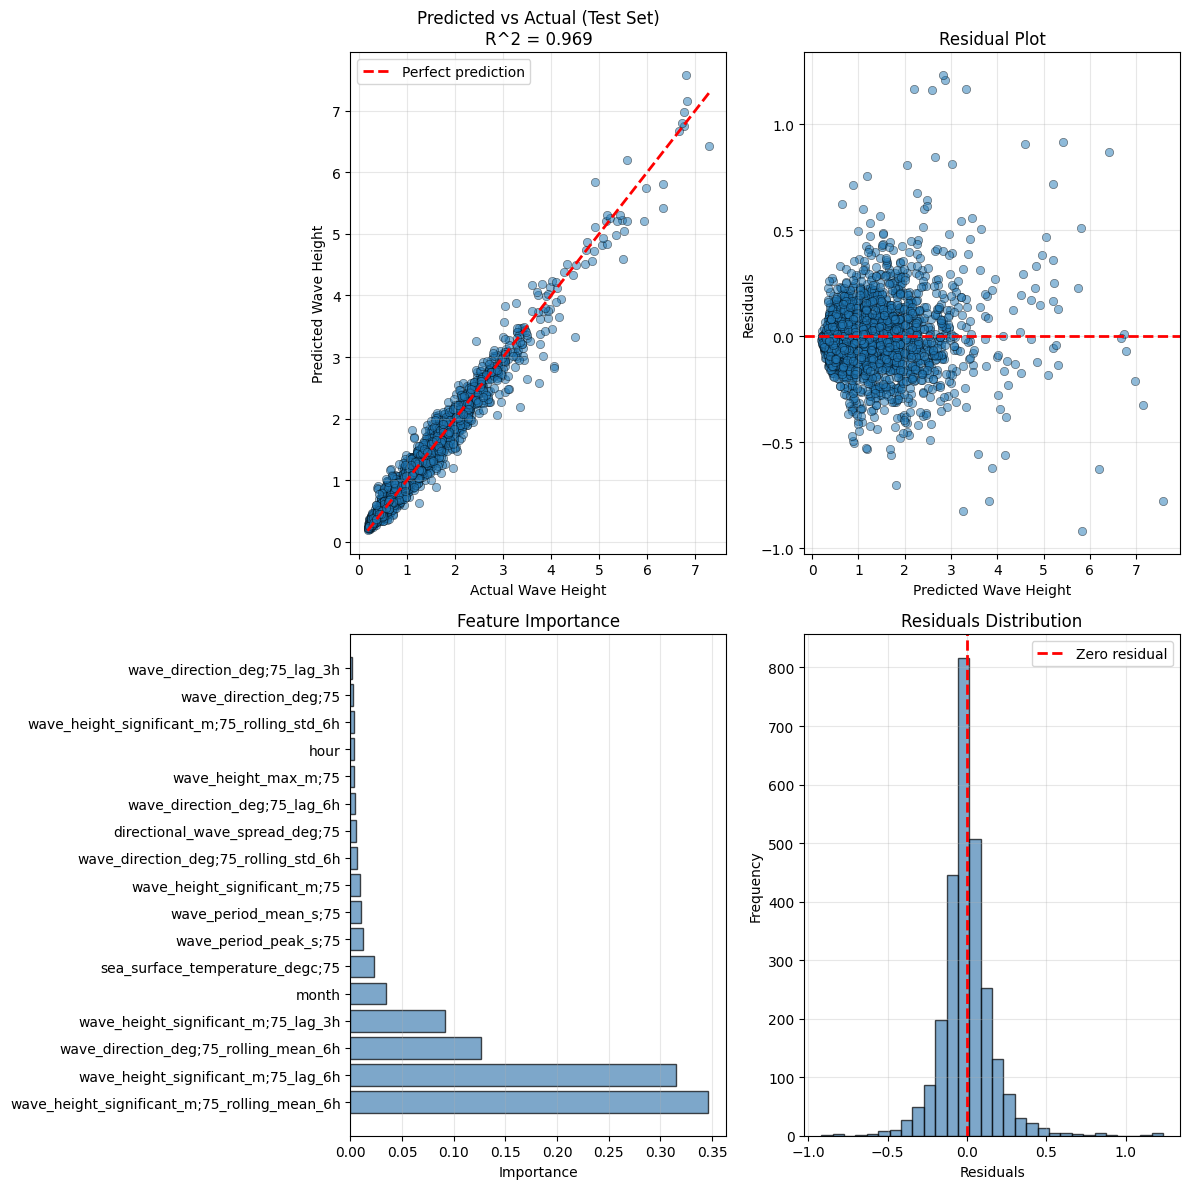

In [8]:
from marine_ml.helpers.optuna_helper import train_with_optuna

model_uri = train_with_optuna(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
)

In addition to MLflow, the model is saved to file, for convenient loading.

Make a prediction...

In [9]:
from marine_ml.serve import model_service

with (MODEL_DIR / "model.pkl").open("rb") as f:
    model = pickle.load(f)

features = {
    "directional_wave_spread_deg;75": 20.0,
    "hour": np.int32(7),
    "month": np.int32(12),
    "sea_surface_temperature_degc;75": 11.5,
    "wave_direction_deg;75": 180.0,
    "wave_direction_deg;75_lag_3h": 170.0,
    "wave_direction_deg;75_lag_6h": 168.0,
    "wave_direction_deg;75_rolling_mean_6h": 175.0,
    "wave_direction_deg;75_rolling_std_6h": 5.0,
    "wave_height_max_m;75": 2.4,
    "wave_height_significant_m;75": 1.8,
    "wave_height_significant_m;75_lag_3h": 1.7,
    "wave_height_significant_m;75_lag_6h": 1.6,
    "wave_height_significant_m;75_rolling_mean_6h": 1.6,
    "wave_height_significant_m;75_rolling_std_6h": 0.1,
    "wave_period_mean_s;75": 12.0,
    "wave_period_peak_s;75": 18.0,
}

wave_height_pred = model_service.predict(features)  # ty: ignore[invalid-argument-type]
print(f"Predicted wave height (m): {np.round(wave_height_pred, decimals=2)}")

INFO:marine_ml.serve:Loading model from MLflow Registry: models:/model-pz-to-lev/Production
INFO:marine_ml.serve:Loaded model version 69 from 'Production' stage


Predicted wave height (m): 3.19


In [10]:
%%bash
# Stop MLflow UI
poe mlflow-stop

Poe => pkill -f 'mlflow'
